In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/champions-league-matches-2025-2026/champions_league_matches.csv


In [61]:
df = pd.read_csv('/kaggle/input/champions-league-matches-2025-2026/champions_league_matches.csv',parse_dates = ['date'],index_col = 'date')

In [62]:
df


,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,home_saves,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,4 of 6,2 of 3,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,4 of 6,2 of 2,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal
2025-09-16,Tottenham,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,436 of 529,295 of 380,1 of 9,...,0 of 0,1 of 1,82.4,77.6,11.1,0.0,NaN,100.0,Home Win,Tottenham
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,2 of 5,1 of 3,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,1 of 4,3 of 7,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-28,Barcelona,FC Copenhagen,NaN,Spotify Camp Nou,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-28,Leverkusen,Villarreal,NaN,BayArena,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-28,Paris S-G,Newcastle Utd,NaN,Parc des Princes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.head()

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,home_saves,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,4 of 6,2 of 3,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,4 of 6,2 of 2,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal
2025-09-16,Tottenham,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,436 of 529,295 of 380,1 of 9,...,0 of 0,1 of 1,82.4,77.6,11.1,0.0,NaN,100.0,Home Win,Tottenham
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,2 of 5,1 of 3,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,1 of 4,3 of 7,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw


In [64]:
df.tail()

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,home_saves,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
date,,,,,,,,,,,,,,,,,,,,,
2026-01-28,Barcelona,FC Copenhagen,NaN,Spotify Camp Nou,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-28,Leverkusen,Villarreal,NaN,BayArena,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-28,Paris S-G,Newcastle Utd,NaN,Parc des Princes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-28,Napoli,Chelsea,NaN,Stadio Diego Armando Maradona,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-28,Pafos FC,Slavia Prague,NaN,Alphamega Stadium,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.describe()

,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct
count,108.000000,108.000000,108.000000,108.000000,105.000000,108.000000
mean,81.935185,81.110185,35.503704,36.310185,70.891429,69.309259
std,5.959102,6.370433,14.425477,16.375220,26.931995,26.615190
min,66.100000,60.900000,5.300000,0.000000,0.000000,0.000000
25%,78.500000,77.875000,25.000000,26.600000,50.000000,50.000000
50%,82.700000,82.400000,35.500000,33.300000,71.400000,71.400000
75%,86.700000,85.825000,43.950000,43.125000,100.000000,100.000000
max,92.100000,93.600000,75.000000,100.000000,100.000000,100.000000


In [66]:
df.shape

(151, 21)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 151 entries, 2025-09-16 to 2026-01-28
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home_team                  144 non-null    object 
 1   away_team                  144 non-null    object 
 2   score                      108 non-null    object 
 3   venue                      144 non-null    object 
 4   referee                    108 non-null    object 
 5   home_possession            108 non-null    object 
 6   away_possession            108 non-null    object 
 7   home_passing_accuracy      108 non-null    object 
 8   away_passing_accuracy      108 non-null    object 
 9   home_shots_on_target       108 non-null    object 
 10  away_shots_on_target       108 non-null    object 
 11  home_saves                 108 non-null    object 
 12  away_saves                 108 non-null    object 
 13  home_passing_accuracy_pct  108 

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
len(df)

151

In [72]:
df.dropna(inplace=True)

In [73]:
df['score'] = df['score'].fillna('0-0')

In [75]:
df.dropna(inplace=True)

In [76]:
df

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,home_saves,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,4 of 6,2 of 3,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,4 of 6,2 of 2,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,2 of 5,1 of 3,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,1 of 4,3 of 7,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw
2025-09-16,Real Madrid,Marseille,2–1,Estadio Santiago Bernabéu,Irfan Peljto,44%,56%,364 of 431,478 of 559,13 of 26,...,4 of 5,13 of 13,84.5,85.5,50.0,33.3,80.0,100.0,Home Win,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-10,Dortmund,Bodø/Glimt,2–2,Signal Iduna Park,Erik Lambrechts,63%,37%,501 of 603,268 of 358,9 of 22,...,1 of 3,7 of 9,83.1,74.9,40.9,42.9,33.3,77.8,Draw,Draw
2025-12-10,Juventus,Pafos FC,2–0,Allianz Stadium,Jesús Gil,61%,39%,529 of 604,313 of 386,5 of 25,...,3 of 3,3 of 5,87.6,81.1,20.0,25.0,100.0,60.0,Home Win,Juventus
2025-12-10,Athletic Club,Paris S-G,0–0,San Mamés,Daniel Siebert,28%,72%,198 of 285,627 of 727,1 of 9,...,4 of 4,1 of 1,69.5,86.2,11.1,22.2,100.0,100.0,Draw,Draw


In [85]:
def total_goals(txt):
    total=0
    for i in txt:
        if i != '-' and i.isdigit():
            total += int(i)
    return total

In [86]:
total_goals('1-3')

4

In [90]:
df['total_goals_scored'] = df['score'].apply(total_goals)

In [91]:
df

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner,total_goals,total_goals_scored
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG,4,4
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal,2,2
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ,5,5
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw,8,8
2025-09-16,Real Madrid,Marseille,2–1,Estadio Santiago Bernabéu,Irfan Peljto,44%,56%,364 of 431,478 of 559,13 of 26,...,84.5,85.5,50.0,33.3,80.0,100.0,Home Win,Real Madrid,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-10,Dortmund,Bodø/Glimt,2–2,Signal Iduna Park,Erik Lambrechts,63%,37%,501 of 603,268 of 358,9 of 22,...,83.1,74.9,40.9,42.9,33.3,77.8,Draw,Draw,4,4
2025-12-10,Juventus,Pafos FC,2–0,Allianz Stadium,Jesús Gil,61%,39%,529 of 604,313 of 386,5 of 25,...,87.6,81.1,20.0,25.0,100.0,60.0,Home Win,Juventus,2,2
2025-12-10,Athletic Club,Paris S-G,0–0,San Mamés,Daniel Siebert,28%,72%,198 of 285,627 of 727,1 of 9,...,69.5,86.2,11.1,22.2,100.0,100.0,Draw,Draw,0,0


In [95]:
df.drop('total_goals',axis=1,inplace=True)

In [96]:
df

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner,total_goals_scored
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,2 of 3,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG,4
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,2 of 2,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal,2
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,1 of 3,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ,5
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,3 of 7,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw,8
2025-09-16,Real Madrid,Marseille,2–1,Estadio Santiago Bernabéu,Irfan Peljto,44%,56%,364 of 431,478 of 559,13 of 26,...,13 of 13,84.5,85.5,50.0,33.3,80.0,100.0,Home Win,Real Madrid,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-10,Dortmund,Bodø/Glimt,2–2,Signal Iduna Park,Erik Lambrechts,63%,37%,501 of 603,268 of 358,9 of 22,...,7 of 9,83.1,74.9,40.9,42.9,33.3,77.8,Draw,Draw,4
2025-12-10,Juventus,Pafos FC,2–0,Allianz Stadium,Jesús Gil,61%,39%,529 of 604,313 of 386,5 of 25,...,3 of 5,87.6,81.1,20.0,25.0,100.0,60.0,Home Win,Juventus,2
2025-12-10,Athletic Club,Paris S-G,0–0,San Mamés,Daniel Siebert,28%,72%,198 of 285,627 of 727,1 of 9,...,1 of 1,69.5,86.2,11.1,22.2,100.0,100.0,Draw,Draw,0


In [118]:
print("Most goals scored is: ",df['total_goals_scored'].max())

Most goals scored is:  9


In [103]:
df[df['total_goals_scored'] == 0]

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner,total_goals_scored
date,,,,,,,,,,,,,,,,,,,,,
2025-09-17,Olympiacos,Pafos FC,0–0,Stadio Georgios Karaiskáki,István Kovács,70%,30%,484 of 613,184 of 268,3 of 18,...,3 of 3,79.0,68.7,16.7,16.7,100.0,100.0,Draw,Draw,0
2025-10-21,Qaırat Almaty,Pafos FC,0–0,Ortalıq Stadion,Chris Kavanagh,68%,32%,501 of 610,183 of 287,2 of 22,...,2 of 2,82.1,63.8,9.1,55.6,100.0,100.0,Draw,Draw,0
2025-10-22,Atalanta,Slavia Prague,0–0,New Balance Arena,Ricardo de Burgos,56%,44%,334 of 463,241 of 360,5 of 22,...,5 of 5,72.1,66.9,22.7,25.0,100.0,100.0,Draw,Draw,0
2025-10-22,Monaco,Tottenham,0–0,Stade Louis II,Marco Guida,56%,44%,409 of 495,307 of 392,8 of 23,...,8 of 8,82.6,78.3,34.8,18.2,100.0,100.0,Draw,Draw,0
2025-11-04,Napoli,Eint Frankfurt,0–0,Stadio Diego Armando Maradona,João Pinheiro,64%,36%,632 of 722,320 of 409,2 of 18,...,2 of 2,87.5,78.2,11.1,42.9,100.0,100.0,Draw,Draw,0
2025-11-25,Slavia Prague,Athletic Club,0–0,Fortuna Arena,Donatas Rumšas,52%,48%,246 of 367,222 of 334,3 of 8,...,3 of 3,67.0,66.5,37.5,33.3,100.0,100.0,Draw,Draw,0
2025-12-10,Athletic Club,Paris S-G,0–0,San Mamés,Daniel Siebert,28%,72%,198 of 285,627 of 727,1 of 9,...,1 of 1,69.5,86.2,11.1,22.2,100.0,100.0,Draw,Draw,0


In [104]:
len(df[df['total_goals_scored'] == 0])

7

In [105]:
df.head()

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner,total_goals_scored
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,2 of 3,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG,4
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,2 of 2,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal,2
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,1 of 3,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ,5
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,3 of 7,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw,8
2025-09-16,Real Madrid,Marseille,2–1,Estadio Santiago Bernabéu,Irfan Peljto,44%,56%,364 of 431,478 of 559,13 of 26,...,13 of 13,84.5,85.5,50.0,33.3,80.0,100.0,Home Win,Real Madrid,3


In [115]:
def win(txt):
    away = 0
    home = 0
    perA = 0
    perH = 0
    for i in txt:
        if i == "Away Win":
            away += 1
        elif i == "Home Win":
            home += 1
    return f"Away teams wins: {away} and percentage of winning is: {away*100/(away+home)}\n Home team wins: {home} and percentage of winning is {home*100/(away+home)}"

In [140]:
print(win(df['result']))

Away teams wins: 35 and percentage of winning is: 41.666666666666664
 Home team wins: 49 and percentage of winning is 58.333333333333336


In [141]:
import re

In [142]:
def goal_diff(score):
    numbers = re.findall(r'\d+', str(score))
    if len(numbers) == 2:
        home, away = map(int, numbers)
        return abs(home - away)
    else:
        return 0
        

In [143]:
goal_diff('2-3')

1

In [144]:
df['goal_difference'] = df['score'].apply(goal_diff)

In [145]:
df

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner,total_goals_scored,goal_difference
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG,4,2
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal,2,2
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ,5,1
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw,8,0
2025-09-16,Real Madrid,Marseille,2–1,Estadio Santiago Bernabéu,Irfan Peljto,44%,56%,364 of 431,478 of 559,13 of 26,...,84.5,85.5,50.0,33.3,80.0,100.0,Home Win,Real Madrid,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-10,Dortmund,Bodø/Glimt,2–2,Signal Iduna Park,Erik Lambrechts,63%,37%,501 of 603,268 of 358,9 of 22,...,83.1,74.9,40.9,42.9,33.3,77.8,Draw,Draw,4,0
2025-12-10,Juventus,Pafos FC,2–0,Allianz Stadium,Jesús Gil,61%,39%,529 of 604,313 of 386,5 of 25,...,87.6,81.1,20.0,25.0,100.0,60.0,Home Win,Juventus,2,2
2025-12-10,Athletic Club,Paris S-G,0–0,San Mamés,Daniel Siebert,28%,72%,198 of 285,627 of 727,1 of 9,...,69.5,86.2,11.1,22.2,100.0,100.0,Draw,Draw,0,0


In [154]:
print(f"Total teams:{len(df['home_team'].unique())}")

Total teams:36


In [155]:
df[['home_team','away_team']]

,home_team,away_team
date,,
2025-09-16,PSV Eindhoven,Union SG
2025-09-16,Athletic Club,Arsenal
2025-09-16,Benfica,Qarabağ
2025-09-16,Juventus,Dortmund
2025-09-16,Real Madrid,Marseille
...,...,...
2025-12-10,Dortmund,Bodø/Glimt
2025-12-10,Juventus,Pafos FC
2025-12-10,Athletic Club,Paris S-G


In [156]:
home_counts = df['home_team'].value_counts()

In [157]:
home_counts

home_team
PSV Eindhoven      3
Athletic Club      3
Benfica            3
Juventus           3
Real Madrid        3
Slavia Prague      3
Olympiacos         3
Liverpool          3
Ajax               3
Paris S-G          3
Club Brugge        3
FC Copenhagen      3
Eint Frankfurt     3
Manchester City    3
Sporting CP        3
Newcastle Utd      3
Atlético Madrid    3
Atalanta           3
Bodø/Glimt         3
Inter              3
Qarabağ            3
Barcelona          3
Marseille          3
Qaırat Almaty      3
Galatasaray        3
Pafos FC           3
Union SG           3
Arsenal            3
Dortmund           3
Monaco             3
Leverkusen         3
Napoli             3
Villarreal         3
Bayern Munich      2
Chelsea            2
Tottenham          2
Name: count, dtype: int64

In [160]:
away_count = df['away_team'].value_counts()

In [161]:
away_count

away_team
Union SG           3
Arsenal            3
Qarabağ            3
Dortmund           3
Marseille          3
Bodø/Glimt         3
Pafos FC           3
Atlético Madrid    3
Inter              3
Chelsea            3
Atalanta           3
Monaco             3
Leverkusen         3
Napoli             3
Qaırat Almaty      3
Barcelona          3
Galatasaray        3
Club Brugge        3
Benfica            3
Eint Frankfurt     3
Slavia Prague      3
Tottenham          3
Real Madrid        3
Liverpool          3
Newcastle Utd      3
Bayern Munich      3
Olympiacos         3
FC Copenhagen      3
Juventus           3
Paris S-G          3
PSV Eindhoven      3
Athletic Club      3
Manchester City    3
Ajax               2
Sporting CP        2
Villarreal         2
Name: count, dtype: int64

In [163]:
total_matches = home_counts.add(away_count, fill_value=0).astype(int)

In [164]:
total_matches

Ajax               5
Arsenal            6
Atalanta           6
Athletic Club      6
Atlético Madrid    6
Barcelona          6
Bayern Munich      5
Benfica            6
Bodø/Glimt         6
Chelsea            5
Club Brugge        6
Dortmund           6
Eint Frankfurt     6
FC Copenhagen      6
Galatasaray        6
Inter              6
Juventus           6
Leverkusen         6
Liverpool          6
Manchester City    6
Marseille          6
Monaco             6
Napoli             6
Newcastle Utd      6
Olympiacos         6
PSV Eindhoven      6
Pafos FC           6
Paris S-G          6
Qarabağ            6
Qaırat Almaty      6
Real Madrid        6
Slavia Prague      6
Sporting CP        5
Tottenham          5
Union SG           6
Villarreal         5
Name: count, dtype: int64

In [172]:
df.head()

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner,total_goals_scored,goal_difference
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG,4,2
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal,2,2
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ,5,1
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw,8,0
2025-09-16,Real Madrid,Marseille,2–1,Estadio Santiago Bernabéu,Irfan Peljto,44%,56%,364 of 431,478 of 559,13 of 26,...,84.5,85.5,50.0,33.3,80.0,100.0,Home Win,Real Madrid,3,1


In [173]:
def win(df):
    if df['result'] == "Home Win":
        return df['home_team']
    elif df['result'] == "Away Win":
        return df['away_team']
    else:
        return None

In [176]:
df1 = df.apply(win,axis=1).value_counts()

Text(0.5, 1.0, 'Number of Wins by Team')

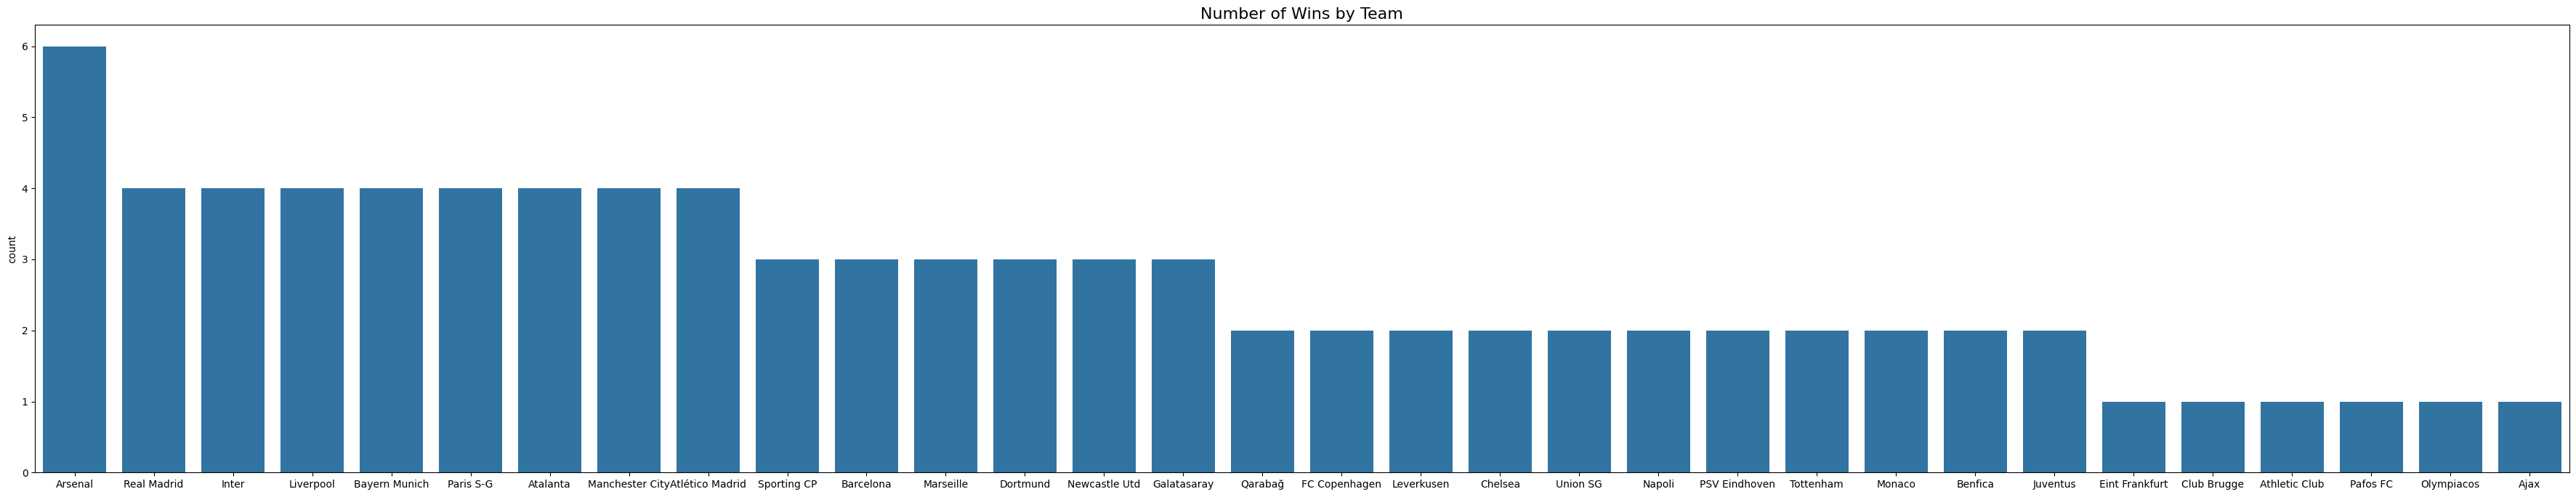

In [192]:
plt.figure(figsize=(45, 8))
sns.barplot(df1)
plt.title("Number of Wins by Team", fontsize=16)

In [194]:
print(f"Top 10 teams by wins \n{df1.head(10)}")

Top 10 teams by wins 
Arsenal            6
Real Madrid        4
Inter              4
Liverpool          4
Bayern Munich      4
Paris S-G          4
Atalanta           4
Manchester City    4
Atlético Madrid    4
Sporting CP        3
Name: count, dtype: int64


<Axes: xlabel='home_passing_accuracy_pct', ylabel='winner'>

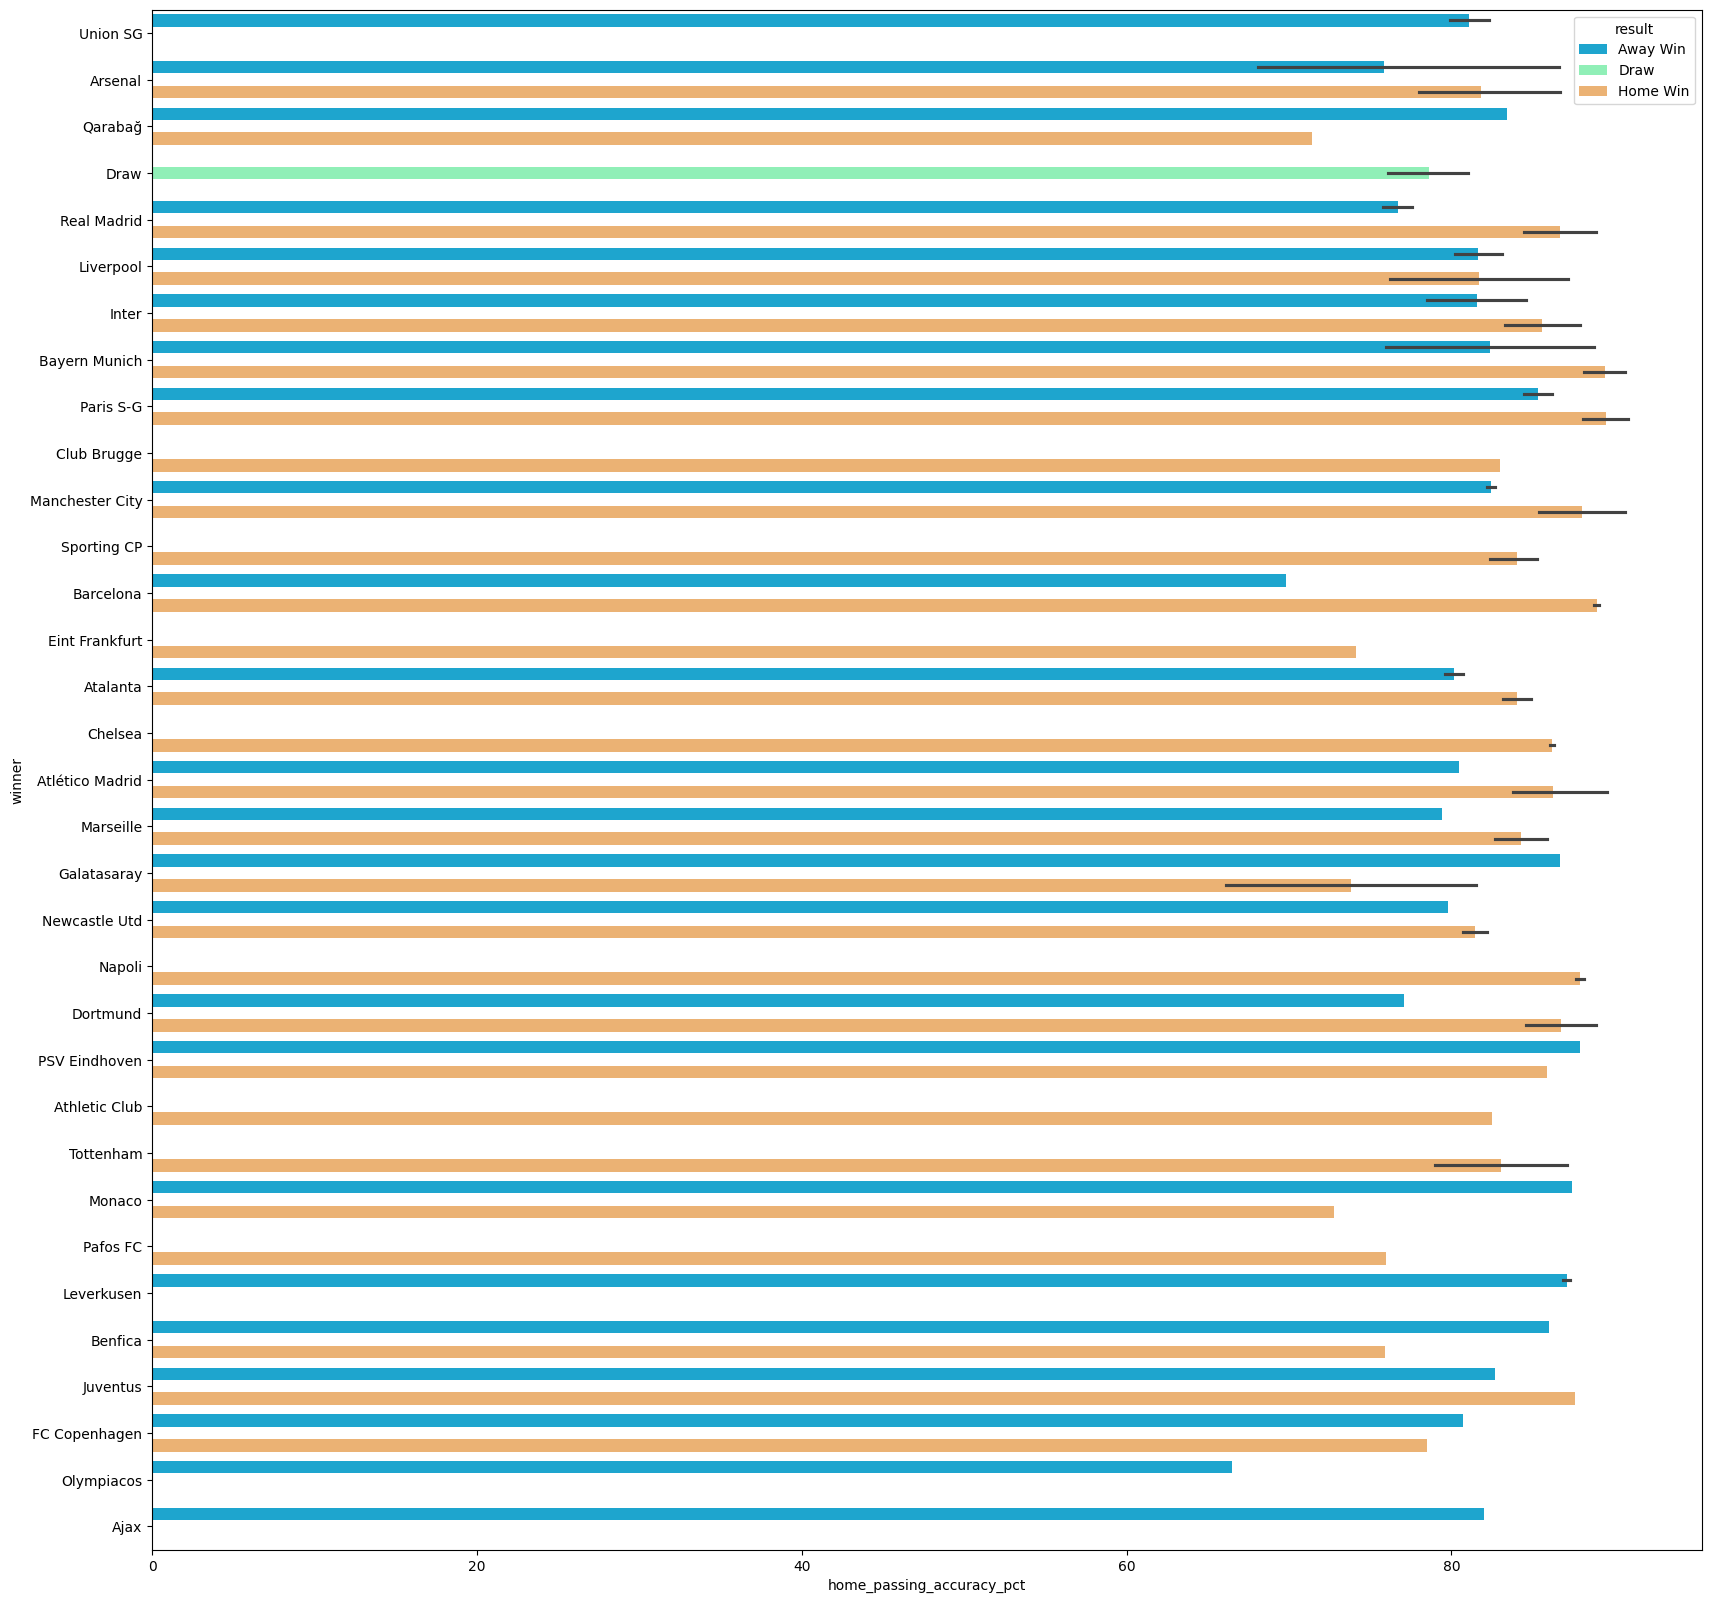

In [206]:
plt.figure(figsize=(20,20))
sns.barplot(x='home_passing_accuracy_pct',y='winner',hue = 'result',data=df,palette = 'rainbow')

<Axes: xlabel='total_goals_scored', ylabel='Count'>

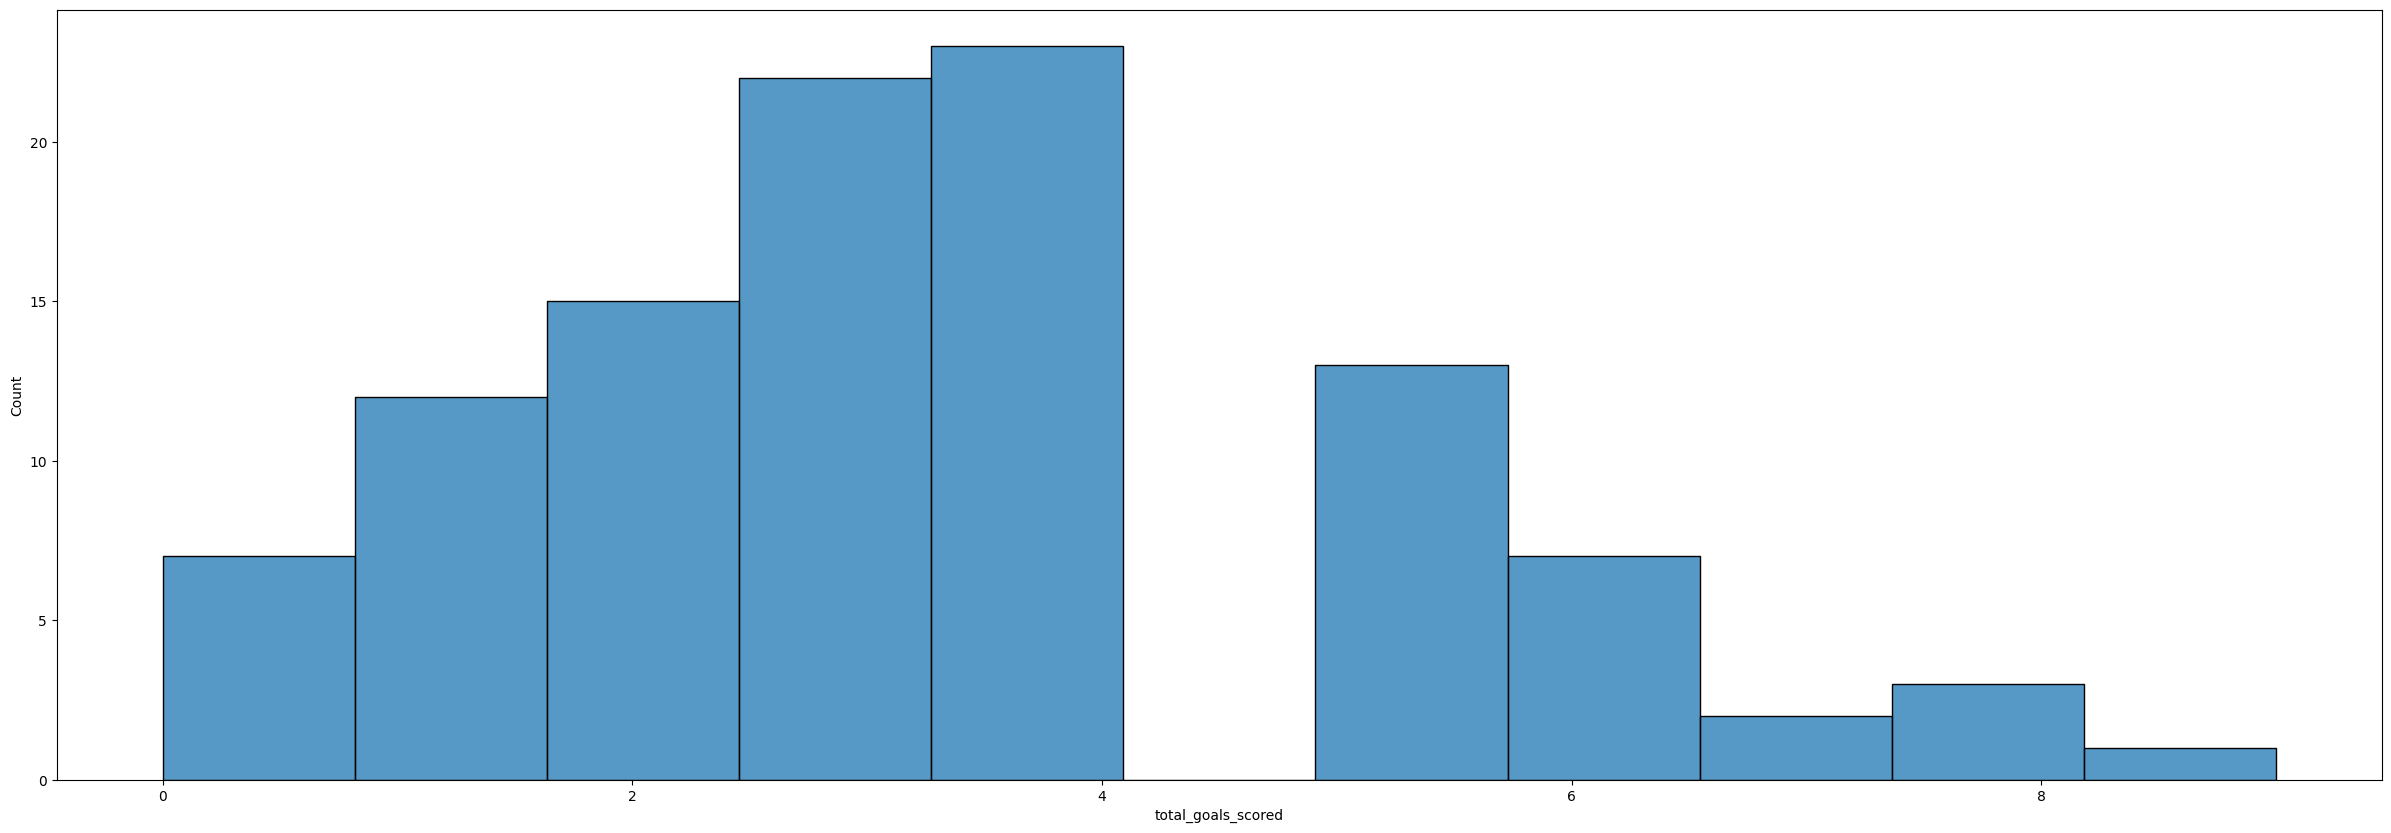

In [214]:
plt.figure(figsize=(30,10))
sns.histplot(df['total_goals_scored'])

In [215]:
df.head()

,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,home_shots_on_target,...,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner,total_goals_scored,goal_difference
date,,,,,,,,,,,,,,,,,,,,,
2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,3 of 10,...,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG,4,2
2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,2 of 11,...,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal,2,2
2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,3 of 14,...,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ,5,1
2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,7 of 19,...,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw,8,0
2025-09-16,Real Madrid,Marseille,2–1,Estadio Santiago Bernabéu,Irfan Peljto,44%,56%,364 of 431,478 of 559,13 of 26,...,84.5,85.5,50.0,33.3,80.0,100.0,Home Win,Real Madrid,3,1


In [224]:
def count_goals_safe(txt):
    numbers = re.findall(r'\d+', str(txt))
    if len(numbers) == 2:
        return int(numbers[0]), int(numbers[1])
    else:
        return 0, 0

df['home_goals'], df['away_goals'] = zip(*df['score'].apply(count_goals_safe))

goals = df[['home_goals','away_goals']]


<Axes: >

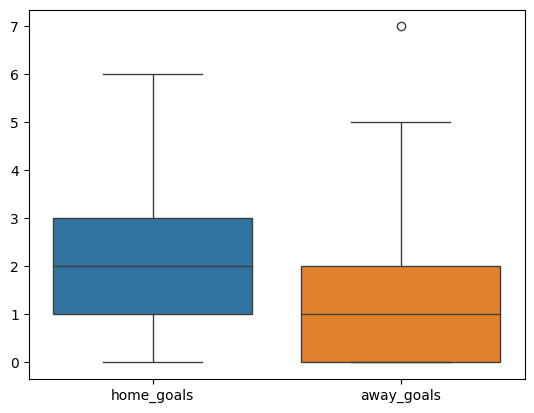

In [228]:
sns.boxplot(data=goals)

<Axes: title={'center': 'Team wins total number of matches'}, ylabel='count'>

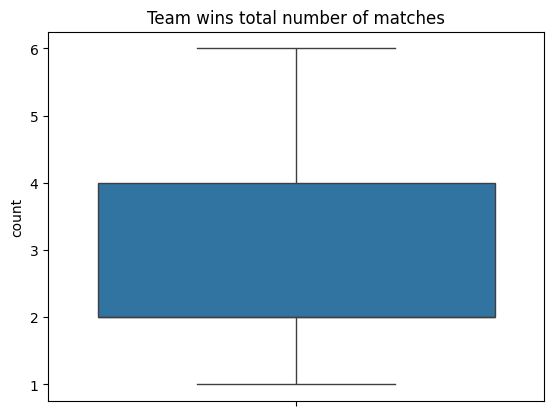

In [230]:
plt.title('Team wins total number of matches')
sns.boxplot(data=df1)

<Axes: >

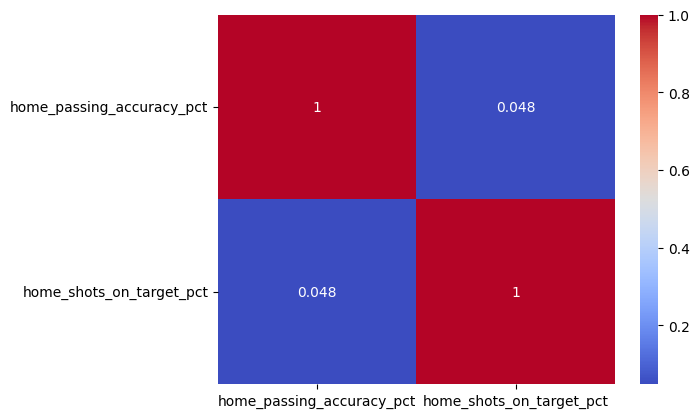

In [234]:
corr = df[['home_passing_accuracy_pct', 'home_shots_on_target_pct']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')